   #                          wine quality prediction using randam forest tree
### importing dependencies


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
#data collection
wds = pd.read_csv(r'D:\bin\data sets\wine\winequality-red.csv')

In [8]:
wds.shape

(1599, 12)

In [9]:
wds.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### checking for missing values


In [102]:
wds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### data analysis and visualization


In [101]:
wds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


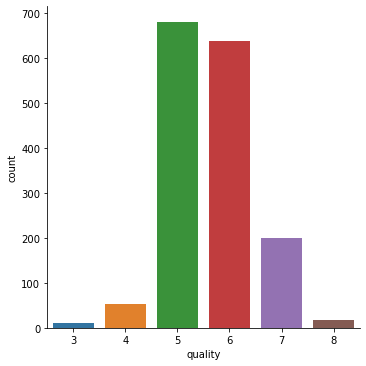

In [15]:
sn.catplot(x='quality',data = wds,kind ='count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

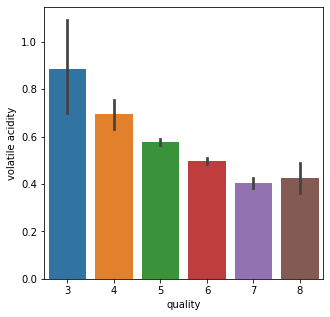

In [20]:
plot = plt.figure(figsize=(5,5))
sn.barplot (x='quality',data = wds,y ='volatile acidity')

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

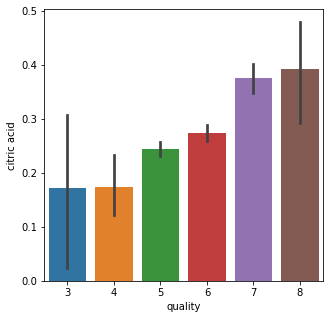

In [24]:
plot = plt.figure(figsize=(5,5))
sn.barplot (x='quality',data = wds,y ='citric acid')

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

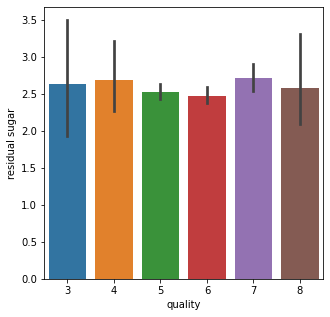

In [25]:
plot = plt.figure(figsize=(5,5))
sn.barplot (x='quality',data = wds,y ='residual sugar')

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

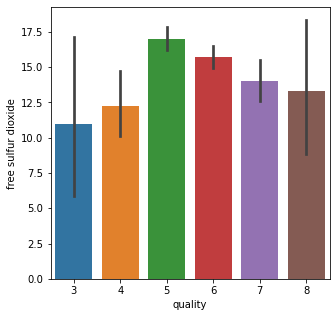

In [26]:
plot = plt.figure(figsize=(5,5))
sn.barplot (x='quality',data = wds,y ='free sulfur dioxide')

In [29]:
# correlation
#neagative correlation
#positive correlation used to find relation between all values
correlation = wds.corr()

<AxesSubplot:>

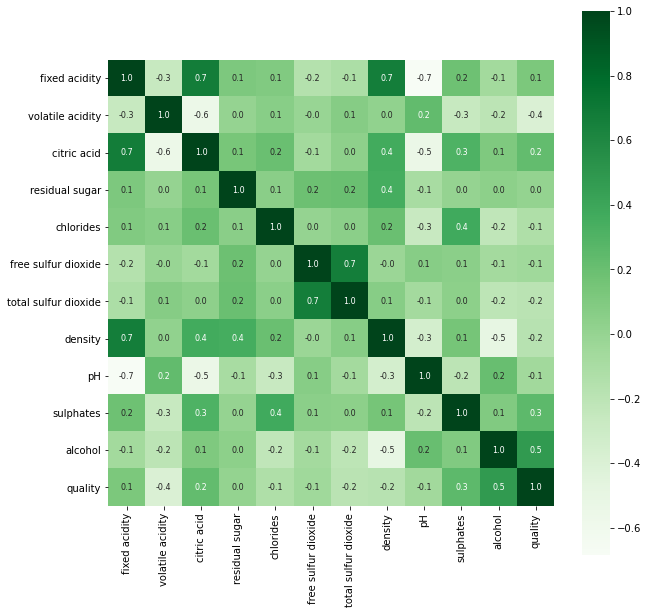

In [39]:
plot = plt.figure(figsize=(10,10))
sn.heatmap(correlation,cbar =True,square=True,fmt= '.1f',annot = True,annot_kws ={"size" :8},cmap = 'Greens' )

### data preprocessing


In [ ]:
x = wds.drop('quality',axis=1)

In [73]:
x.shape

(1599, 11)

In [44]:
# label binarization or label enconding
y = wds['quality'].apply(lambda y_value:1 if y_value>=7 else 0 )

In [74]:
y.shape

(1599,)

In [50]:
#spliting training and test data

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [76]:
print(x_train.shape,y_train.shape)

(1279, 11) (1279,)


In [53]:
# model training using random forest tree

In [77]:
model = RandomForestClassifier()


In [78]:
model.fit(x_train,y_train)


RandomForestClassifier()

### model evaluation


In [ ]:
x_testprediction = model.predict(x_test)

In [89]:
x_testprediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [84]:
test_data_accuracy = accuracy_score(x_testprediction,y_test)

In [83]:
print(test_data_accuracy)

0.91875


#                            builing predictive system


In [99]:
input_data =(8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.3,0.75,10.5)
# changing tuple to array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting label for only one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


C:\Users\uic40062\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
